# MNIST dataset

- MNIST 数据集是一个经典的手写数字数据集，广泛用于机器学习和计算机视觉的研究和教学。它包含 60,000 张训练图像和 10,000 张测试图像，每张图像是 28x28 像素的灰度图像，表示从 0 到 9 的手写数字。
- MNIST 数据集是一个严格标注的数据集。每张图像都对应一个标签，表示图像中的手写数字（0 到 9）。这使得 MNIST 数据集非常适合用于监督学习任务，例如图像分类。

### MNIST 数据集的基本信息
1. **数据集内容**：
   - **图像数据**：
      - 每张图像由 28x28 个像素组成，每个像素的值在 0 到 255 之间，表示灰度级别。
      - 图像数据可以表示为一个 28x28 的矩阵，或者展平为一个长度为 784（28*28）的向量。
   - **标签数据**：
      - 每张图像对应一个标签，表示图像中的数字（0 到 9）。
      - 标签数据是一个整数，表示图像中的数字。

2. **数据集划分**：
   - 训练集：60,000 张图像，用于训练模型。(938*64=60032)
   - 测试集：10,000 张图像，用于评估模型的性能。

3. **数据格式**：
   - 图像数据：每张图像可以表示为一个 28x28 的矩阵，或者展平为一个长度为 784 的向量。每个像素的值在 0 到 255 之间，表示灰度级别。
   - 标签数据：每张图像对应一个标签，是一个整数，表示图像中的数字。

## MNIST dataset shape
```python
image_shape = ([1, 28, 28])
label_shape = ([1])
```

展平为向量后的图像数据形状为 (784,)，标签数据形状为 (1,)。
用列向量(矩阵)表示一个图像:
$$
\begin{bmatrix}
x_0 \\
x_1  \\
x_2  \\
\vdots \\
x_{783}  \\
\end{bmatrix}
$$

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
])

# 加载训练集
train_dataset = datasets.MNIST(root='../data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 加载测试集
test_dataset = datasets.MNIST(root='../data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# 查看一个批次的图像和标签
images, labels = next(iter(train_loader))
print(f'图像数据的形状: {images.shape}')  # 输出: torch.Size([64, 1, 28, 28])
print(f'标签数据的形状: {labels.shape}')  # 输出: torch.Size([64])

图像数据的形状: torch.Size([64, 1, 28, 28])
标签数据的形状: torch.Size([64])


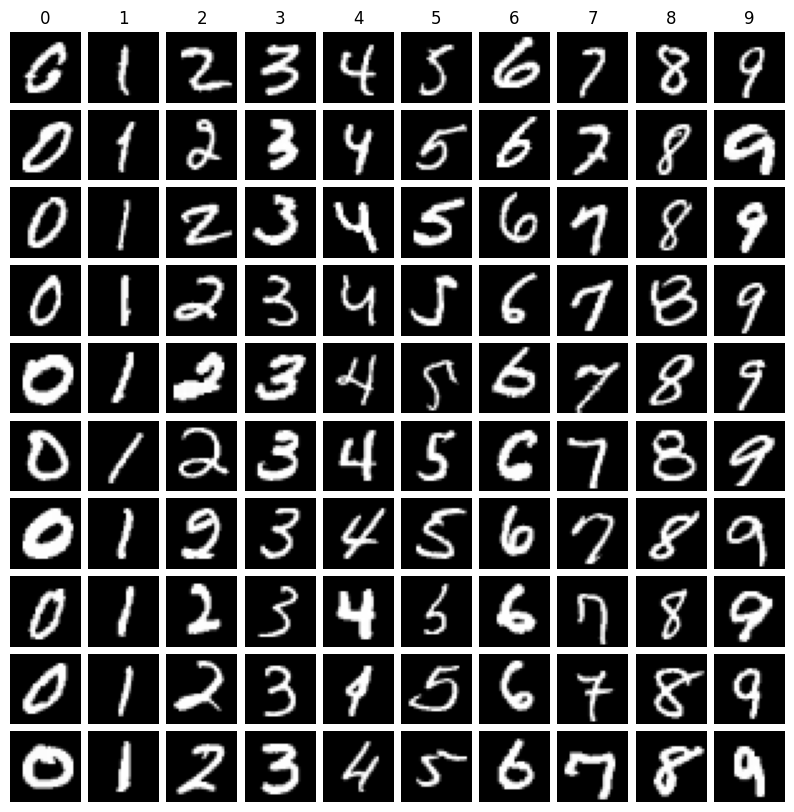

In [7]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
])
# 加载训练集
train_dataset = datasets.MNIST(root='../data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=1000, shuffle=True)

# 初始化存储图像和标签的列表
images_list = []
labels_list = []

# 从数据集中多次采样，直到每个标签都有至少 10 张图像
while len(images_list) < 100:
    images, labels = next(iter(train_loader))
    for i in range(10):
        mask = labels == i
        if mask.sum() > 0:
            images_list.append(images[mask][:10])
            labels_list.append(labels[mask][:10])

# 将图像和标签转换为 numpy 数组
images = torch.cat(images_list)[:100].numpy()
labels = torch.cat(labels_list)[:100].numpy()

# 创建一个空的图像数组，用于存储排序后的图像
sorted_images = np.zeros((10, 10, 28, 28))

# 按标签排序图像
for i in range(10):
    sorted_images[i] = images[labels == i][:10, 0]

# 可视化 100 张图像，并标注标签
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(sorted_images[j, i], cmap='gray')
        ax.axis('off')
        if i == 0:
            ax.set_title(str(j), fontsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

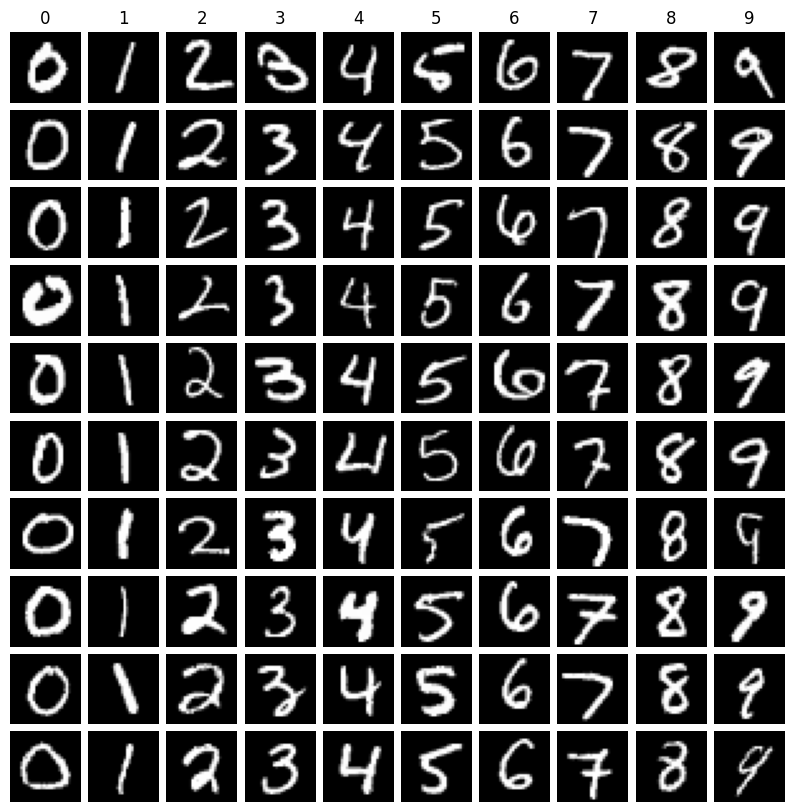

In [8]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
])
# # 加载训练集
# train_dataset = datasets.MNIST(root='../data', train=True, transform=transform, download=True)
# train_loader = DataLoader(dataset=train_dataset, batch_size=1000, shuffle=True)
# 加载测试集
test_dataset = datasets.MNIST(root='../data', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# 初始化存储图像和标签的列表
images_list = []
labels_list = []

# 从数据集中多次采样，直到每个标签都有至少 10 张图像
while len(images_list) < 100:
    images, labels = next(iter(test_loader))
    for i in range(10):
        mask = labels == i
        if mask.sum() > 0:
            images_list.append(images[mask][:10])
            labels_list.append(labels[mask][:10])

# 将图像和标签转换为 numpy 数组
images = torch.cat(images_list)[:100].numpy()
labels = torch.cat(labels_list)[:100].numpy()

# 创建一个空的图像数组，用于存储排序后的图像
sorted_images = np.zeros((10, 10, 28, 28))

# 按标签排序图像
for i in range(10):
    sorted_images[i] = images[labels == i][:10, 0]

# 可视化 100 张图像，并标注标签
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax = axes[i, j]
        ax.imshow(sorted_images[j, i], cmap='gray')
        ax.axis('off')
        if i == 0:
            ax.set_title(str(j), fontsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

### 使用 PyTorch 加载 MNIST 数据集
PyTorch 提供了方便的工具来加载和处理 MNIST 数据集。以下是使用 PyTorch 加载 MNIST 数据集的步骤。

#### 安装 PyTorch
首先，确保你已经安装了 PyTorch。你可以使用以下命令安装 PyTorch：
```bash
pip install torch torchvision
```

#### 加载 MNIST 数据集
使用 `torchvision` 库加载 MNIST 数据集，并进行数据预处理。

```python
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 定义数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 归一化到 [-1, 1]
])

# 加载训练集
train_dataset = datasets.MNIST(root='.', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 加载测试集
test_dataset = datasets.MNIST(root='.', train=False, transform=transform, download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)
```

### 查看 MNIST 数据集
可以使用 `matplotlib` 库来可视化 MNIST 数据集中的图像。

```python
import matplotlib.pyplot as plt

# 获取一个批次的图像和标签
images, labels = next(iter(train_loader))

# 显示前 6 张图像
fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    ax = axes[i]
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}')
    ax.axis('off')
plt.show()
```

### 使用 MNIST 数据集训练神经网络
以下是一个简单的神经网络示例，使用 MNIST 数据集进行训练和评估。

#### 定义神经网络模型
```python
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
```

#### 训练神经网络
```python
# 超参数
input_size = 28 * 28  # 输入层大小（28x28 的图像展平为向量）
hidden_size = 128  # 隐藏层大小
output_size = 10  # 输出层大小（10 个类别）
learning_rate = 0.001
epochs = 10
batch_size = 64

# 初始化模型、损失函数和优化器
model = SimpleNN(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练神经网络
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 将图像展平为向量
        images = images.view(-1, 28*28)

        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)

        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')
```

#### 评估神经网络
```python
# 评估模型在测试集上的性能
model.eval()  # 设置模型为评估模式
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')
```

### 解释
1. **加载 MNIST 数据集**：使用 `torchvision` 库加载 MNIST 数据集，并进行数据预处理。
2. **查看 MNIST 数据集**：使用 `matplotlib` 库可视化 MNIST 数据集中的图像。
3. **定义神经网络模型**：定义一个简单的两层全连接神经网络。
4. **训练神经网络**：使用 MNIST 数据集训练神经网络，并输出训练过程中的损失值。
5. **评估神经网络**：在测试集上评估模型的性能，并输出准确率。

通过这种方式，你可以使用 MNIST 数据集学习和训练神经网络，理解其基本原理和训练过程。如果你有任何问题，请随时提问。